In [32]:
import sys
sys.path.append('../')

In [33]:
from scripts.utils import data_path, set_mpl
from scripts.cross_match_scripts import fits_to_pandas, pandas_to_fits, decode_str_columns
import pandas as pd
from tqdm import tqdm
import numpy as np
import seaborn as sns
from astropy.coordinates import SkyCoord
import astropy.coordinates 
import astroquery
import sklearn
from sklearn import model_selection
import astropy


from astropy import cosmology 
import astropy.units as u
cosmo = cosmology.FlatLambdaCDM(H0 = 73.0,Om0=0.25)

def calc_lumin(fx_05_2, z):
    lumin = 4*np.pi*fx_05_2*(u.erg/u.s/u.cm**2)*(cosmo.luminosity_distance(z))**2
    lumin = lumin.to(u.erg/u.s).value
    return lumin
%matplotlib inline

In [34]:
class_df = pd.read_pickle(data_path+'ERO_lhpv_03_23_sd01_a15_g14_desi_nway_match_xmatch_simbad.gz_pkl', compression='gzip')
class_df['Lx'] = class_df.apply(lambda row: calc_lumin(row['flux_05-20'], row['redshift_final']), axis=1)
class_df['logLx'] = np.log10(class_df['Lx'])
class_df

/Users/sdbykov/opt/miniconda3/envs/venv_hea/lib/python3.10/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


,srcname_fin,RA_fin,DEC_fin,GLON,GLAT,pos_r98,DET_LIKE_0,ML_FLUX_0,ML_FLUX_ERR_0,ML_CTS_0,ML_CTS_ERR_0,ML_EXP_1,EXT,EXT_LIKE,EXT_ERR,ID_SRC,ID_CLUSTER,RA,DEC,RADEC_ERR,DIST_NN,SRCDENS,TSTART,TSTOP,EXT_LOWERR,EXT_UPERR,ML_RATE_0,ML_RATE_ERR_0,ML_BKG_0,RA_corr,DEC_corr,g_id,g_d2d,g_nsrc,g_s,g_gmag,g_maxLx,g_b,s_id,s_z,s_otype,s_d2d,s_nsrc,flag_xray,flag_radio,flag_agn_wise,w1,w2,w3,w1snr,w2snr,w3snr,w_nsrc,sdss_nsrc,sdss_p,sdss_id,sdss_sp,sdss_d2d,hpidx,RADEC_ERR_fin,pos_sigma_2d,pos_r68,pos_r95,ELON,ELAT,flux_05-20,NH,desi_id,nway_desi_id_true_ctp,nway_Separation_EROSITA_DESI,nway_pos_err,nway_prob_has_match,nway_prob_this_match,nway_nnmag_grzw1w2,nway_nnmag_grzw1,nway_nnmag_grz,nway_n_match_flag_0,nway_n_match_flag_2,nway_is_closest,nway_is_within_pos_r98,desi_release,desi_objid,desi_brickid,desi_ra,desi_dec,desi_flux_g,desi_flux_r,desi_flux_z,desi_flux_w1,desi_flux_w2,desi_flux_w3,desi_flux_w4,desi_flux_ivar_g,desi_flux_ivar_r,desi_flux_ivar_z,desi_flux_ivar_w1,desi_flux_ivar_w2,desi_flux_ivar_w3,desi_flux_ivar_w4,desi_dered_mag_g,desi_dered_mag_r,desi_dered_mag_z,desi_dered_mag_w1,desi_dered_mag_w2,desi_dered_mag_w3,desi_dered_mag_w4,desi_snr_g,desi_snr_r,desi_snr_z,desi_snr_w1,desi_snr_w2,desi_snr_w3,desi_snr_w4,desi_type,desi_parallax,desi_parallax_ivar,desi_pmra,desi_pmra_ivar,desi_pmdec,desi_pmdec_ivar,desi_ref_cat,desi_ref_id,desi_mjd_max,desi_mjd_min,desi_iso_max,desi_iso_min,GAIA_sep,GAIA_source_id,GAIA_ra,GAIA_ra_error,GAIA_dec,GAIA_dec_error,GAIA_parallax,GAIA_parallax_error,GAIA_pmra,GAIA_pmra_error,GAIA_pmdec,GAIA_pmdec_error,GAIA_phot_g_mean_flux,GAIA_phot_g_mean_flux_error,GAIA_phot_g_mean_mag,GAIA_phot_bp_mean_flux,GAIA_phot_bp_mean_flux_error,GAIA_phot_bp_mean_mag,GAIA_phot_rp_mean_flux,GAIA_phot_rp_mean_flux_error,GAIA_phot_rp_mean_mag,GAIA_bp_rp,GAIA_classprob_dsc_combmod_quasar,GAIA_classprob_dsc_combmod_galaxy,GAIA_classprob_dsc_combmod_star,GAIA_classprob_dsc_combmod_whitedwarf,GAIA_classprob_dsc_combmod_binarystar,GAIA_spectraltype_esphs,GAIA_distance_gspphot,GAIA_distance_msc,SDSS_angDist,SDSS_objID,SDSS_RA_ICRS,SDSS_DE_ICRS,SDSS_errHalfMaj,SDSS_errHalfMin,SDSS_errPosAng,SDSS_mode,SDSS_class,SDSS_clean,SDSS_e_RA_ICRS,SDSS_e_DE_ICRS,SDSS_umag,SDSS_gmag,SDSS_rmag,SDSS_imag,SDSS_zmag,SDSS_e_umag,SDSS_e_gmag,SDSS_e_rmag,SDSS_e_imag,SDSS_e_zmag,SDSS_zsp,SDSS_e_zsp,SDSS_f_zsp,SDSS_spCl,SDSS_subCl,SDSS_pmRA,SDSS_pmDE,SDSS_e_pmRA,SDSS_e_pmDE,SDSS_sigRA,SDSS_sigDE,SDSS_zph,SDSS_e_zph,SDSS_<zph>,SDSS_Q,SDSS_SDSS16,SDSS_Sp-ID,SDSS_MJD,SDSS_NAME,MILQ_sep,MILQ_RA,MILQ_DEC,MILQ_NAME,MILQ_TYPE,MILQ_RMAG,MILQ_BMAG,MILQ_COMMENT,MILQ_R,MILQ_B,MILQ_Z,MILQ_CITE,MILQ_ZCITE,MILQ_RXPCT,MILQ_QPCT,MILQ_XNAME,MILQ_RNAME,MILQ_LOBE1,MILQ_LOBE2,class_GAIA_class,class_SDSS_class,class_MILQ_class,class_final,redshift_final,all_mag_g,rel_mag_g,rel_dered_mag_g,all_mag_r,rel_mag_r,rel_dered_mag_r,all_mag_z,rel_mag_z,rel_dered_mag_z,all_mag_w1,rel_mag_w1,rel_dered_mag_w1,vega_mag_w1,all_mag_w2,rel_mag_w2,rel_dered_mag_w2,vega_mag_w2,all_mag_w3,rel_mag_w3,rel_dered_mag_w3,vega_mag_w3,all_mag_w4,rel_mag_w4,rel_dered_mag_w4,vega_mag_w4,rel_desi_flux_corr_z,rel_g_r,rel_g_z,rel_r_z,all_g_r,all_g_z,all_r_z,dered_g_r,dered_g_z,dered_r_z,rel_dered_g_r,rel_dered_g_z,rel_dered_r_z,rel_g_w1,rel_r_w1,rel_z_w1,rel_g_w2,rel_r_w2,rel_z_w2,rel_w1_w2,rel_w2_w3,vega_w1_w2,vega_w2_w3,rel_w1_w3,rel_w1_w4,vega_w1_w3,vega_w1_w4,lg(Fx/Fo_g),lg(Fx/Fo_r),lg(Fx/Fo_z),rel_dered_lg(Fx/Fo_z),rel_dered_lg(Fx/Fo_z_corr),rel_dered_lg(Fx/Fo_g),rel_dered_lg(Fx/Fo_r),is_gaia_star,OTYPE_rough_fin,class_4,extended,zorder,Lx,logLx
7963,SRGe J105433.6+562845,163.640190,56.479156,150.236375,54.007720,5.484931,62.062992,1.949096e-14,3.363606e-15,46.088207,7.953562,2160.250000,0.0,0.0,0.0,2355,1860,163.642199,56.477867,2.300617,75.108620,0.000010,6.268413e+08,6.270701e+08,0.0,0.0,0.021335,0.003682,10.767665,163.640190,56.479156,-1,-1.000000,0,-1,NaN,-1.0,-1,NaN,NaN,NaN,-1.000000,0,0,0,0,15.997000,15.285,12.436,21.7,14.2,2.5,1,2,0,1237657771787551132,0,5.511638,68575083462,2.3006

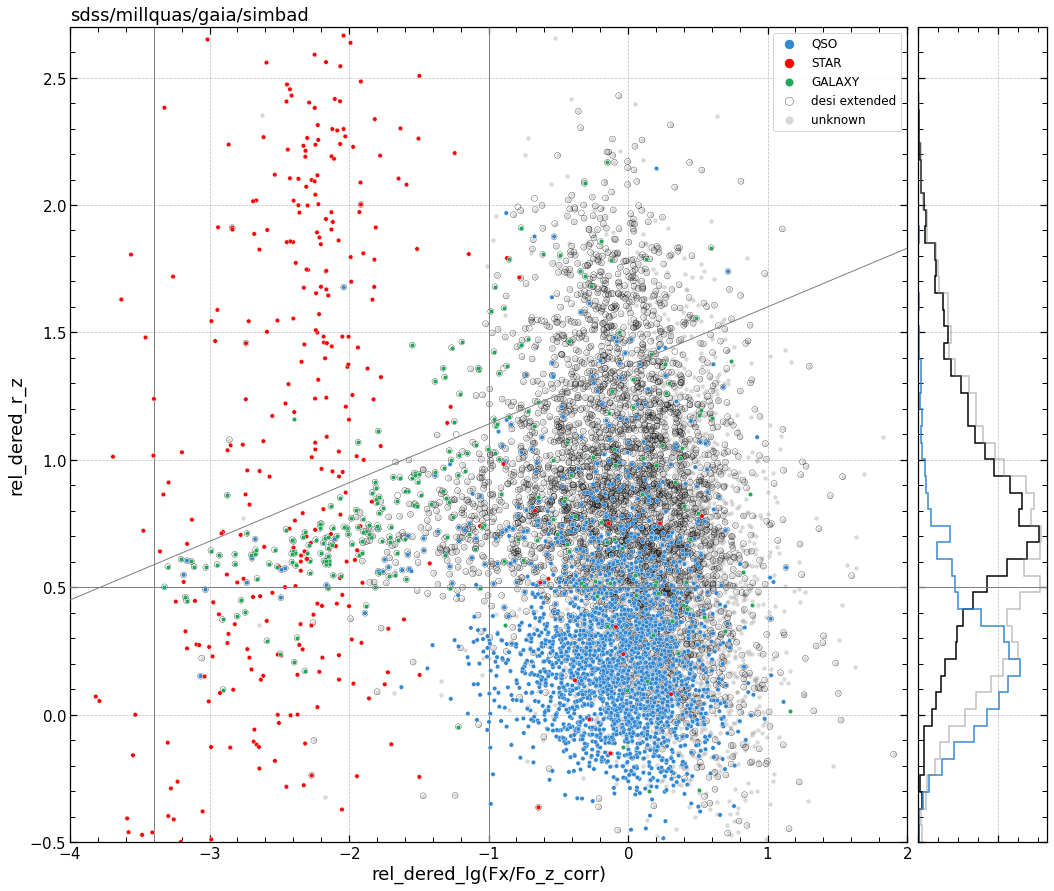

In [35]:

def upper(x):
    return .23*x + 1.37

fig, ax = plt.subplots(1, 1, figsize=(15, 15))

xlims = np.array([-4, 2])
ylims = [-.5, 2.7]

x='rel_dered_lg(Fx/Fo_z_corr)'
y='rel_dered_r_z'

unknown_df = class_df[class_df['class_4']=='unknown']
galaxy_df = class_df[class_df['class_4']=='GALAXY']
qso_star_df = class_df[class_df['class_4'].isin(['QSO', 'STAR'])]
qso_df = class_df[class_df['class_4']=='QSO']
extended_df = class_df.query('desi_type != "PSF"')

hue_args = {'hue': 'class_4',
            'hue_order':[
                'QSO', 'STAR'
                ],
            'palette': {
                'QSO': 'C0',
                'STAR': 'r'
                }
            }

# Scatterplots
sns.scatterplot(
    data=unknown_df, x=x, y=y, ax=ax, s=20, color='gray',
    zorder=1, alpha=.3, label='unknown'
    )
sns.scatterplot(
    data=extended_df, x=x, y=y, ax=ax, s=35, color='none', edgecolor='k',
    linewidth=.3, zorder=2, alpha=1, label='desi extended'
    )
sns.scatterplot(
    data=qso_star_df, x=x, y=y, ax=ax, s=20, **hue_args, zorder=3
    )
sns.scatterplot(
    data=galaxy_df, x=x, y=y, ax=ax, s=20, color='C2',
    zorder=4, label='GALAXY'
    )

ax.set_ylim(ylims[0], ylims[1])
ax.set_xlim(*xlims)

handles, labels = plt.gca().get_legend_handles_labels()
order = [2, 3, 4, 1, 0]
lgnd = ax.legend(
    [handles[idx] for idx in order], [labels[idx] for idx in order],
    frameon=True, loc='upper right', fontsize=12
)
for handle in lgnd.legendHandles:
    handle._sizes = [70]

ax.plot(xlims, upper(xlims), color='gray', zorder=4, lw=1)
ax.axhline(y=.5, color='gray', zorder=4, lw=1)
[ax.axvline(_x, lw=1, color='gray') for _x in [-3.4, -1]]

# Histograms
rect_histy = [.91, .125, .12, .755]
ax_histy = fig.add_axes(rect_histy)
color_bin_edges = np.linspace(*ylims, 50)
ax_histy.hist(
    extended_df[y], orientation='horizontal', color='k',
    histtype='step', lw=1.5, bins=color_bin_edges
    )
ax_histy.hist(
    qso_df[y], orientation='horizontal', color='C0',
    histtype='step', lw=1.5, bins=color_bin_edges
    )
ax_histy.hist(
    unknown_df[y], orientation='horizontal', color='gray',
    histtype='step', lw=1.5, alpha=.5, bins=color_bin_edges
    )
ax_histy.axhline(y=.5, color='gray', linewidth=1)
ax_histy.set_ylim(*ylims)
ax_histy.set_yticklabels([])
ax_histy.set_xticklabels([])

ax.set_title('sdss/millquas/gaia/simbad')

plt.show()

# Redshifts and luminosities per class

<AxesSubplot:xlabel='rel_dered_lg(Fx/Fo_z_corr)', ylabel='rel_dered_r_z'>

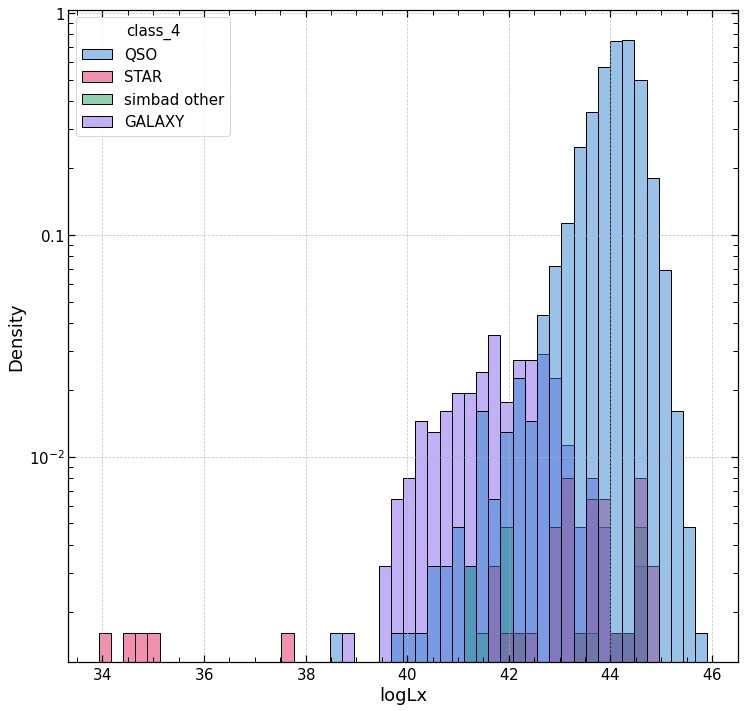

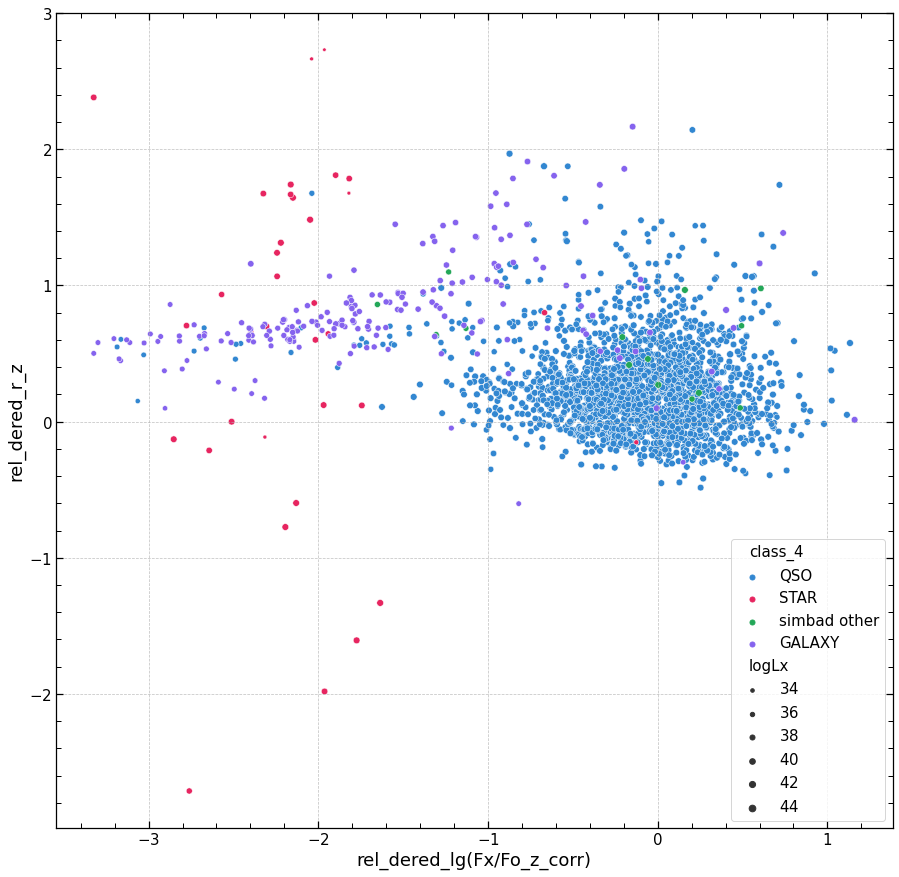

In [50]:


x='rel_dered_lg(Fx/Fo_z_corr)'
y='rel_dered_r_z'

class_df_z = class_df.query("~redshift_final.isna() & class_4 != 'unknown' & logLx > 0 ")

#hist of logLx per class
fig,  ax =  plt.subplots( figsize = (12,12))
sns.histplot(data = class_df_z, x = 'logLx', hue= 'class_4', bins=50, legend=True, stat='density', ax = ax)
ax.set_yscale('log')

fig,  ax =  plt.subplots( figsize = (15,15))

# Scatterplots
sns.scatterplot(
    data=class_df_z, x=x, y=y, ax=ax, s=20, hue = 'class_4', size = 'logLx',
    )

In [53]:
class_df_z.query("class_4 == 'STAR'")['logLx'].describe()

count    36.000000
mean     42.371609
std       3.081039
min      33.927432
25%      42.351675
50%      43.370817
75%      43.997069
max      44.908005
Name: logLx, dtype: float64

# Compare the bulk of unknown population with SDSS quasars

In [13]:
df_compare

,srcname_fin,RA_fin,DEC_fin,GLON,GLAT,pos_r98,DET_LIKE_0,ML_FLUX_0,ML_FLUX_ERR_0,ML_CTS_0,ML_CTS_ERR_0,ML_EXP_1,EXT,EXT_LIKE,EXT_ERR,ID_SRC,ID_CLUSTER,RA,DEC,RADEC_ERR,DIST_NN,SRCDENS,TSTART,TSTOP,EXT_LOWERR,EXT_UPERR,ML_RATE_0,ML_RATE_ERR_0,ML_BKG_0,RA_corr,DEC_corr,g_id,g_d2d,g_nsrc,g_s,g_gmag,g_maxLx,g_b,s_id,s_z,s_otype,s_d2d,s_nsrc,flag_xray,flag_radio,flag_agn_wise,w1,w2,w3,w1snr,w2snr,w3snr,w_nsrc,sdss_nsrc,sdss_p,sdss_id,sdss_sp,sdss_d2d,hpidx,RADEC_ERR_fin,pos_sigma_2d,pos_r68,pos_r95,ELON,ELAT,flux_05-20,NH,desi_id,nway_desi_id_true_ctp,nway_Separation_EROSITA_DESI,nway_pos_err,nway_prob_has_match,nway_prob_this_match,nway_nnmag_grzw1w2,nway_nnmag_grzw1,nway_nnmag_grz,nway_n_match_flag_0,nway_n_match_flag_2,nway_is_closest,nway_is_within_pos_r98,desi_release,desi_objid,desi_brickid,desi_ra,desi_dec,desi_flux_g,desi_flux_r,desi_flux_z,desi_flux_w1,desi_flux_w2,desi_flux_w3,desi_flux_w4,desi_flux_ivar_g,desi_flux_ivar_r,desi_flux_ivar_z,desi_flux_ivar_w1,desi_flux_ivar_w2,desi_flux_ivar_w3,desi_flux_ivar_w4,desi_dered_mag_g,desi_dered_mag_r,desi_dered_mag_z,desi_dered_mag_w1,desi_dered_mag_w2,desi_dered_mag_w3,desi_dered_mag_w4,desi_snr_g,desi_snr_r,desi_snr_z,desi_snr_w1,desi_snr_w2,desi_snr_w3,desi_snr_w4,desi_type,desi_parallax,desi_parallax_ivar,desi_pmra,desi_pmra_ivar,desi_pmdec,desi_pmdec_ivar,desi_ref_cat,desi_ref_id,desi_mjd_max,desi_mjd_min,desi_iso_max,desi_iso_min,GAIA_sep,GAIA_source_id,GAIA_ra,GAIA_ra_error,GAIA_dec,GAIA_dec_error,GAIA_parallax,GAIA_parallax_error,GAIA_pmra,GAIA_pmra_error,GAIA_pmdec,GAIA_pmdec_error,GAIA_phot_g_mean_flux,GAIA_phot_g_mean_flux_error,GAIA_phot_g_mean_mag,GAIA_phot_bp_mean_flux,GAIA_phot_bp_mean_flux_error,GAIA_phot_bp_mean_mag,GAIA_phot_rp_mean_flux,GAIA_phot_rp_mean_flux_error,GAIA_phot_rp_mean_mag,GAIA_bp_rp,GAIA_classprob_dsc_combmod_quasar,GAIA_classprob_dsc_combmod_galaxy,GAIA_classprob_dsc_combmod_star,GAIA_classprob_dsc_combmod_whitedwarf,GAIA_classprob_dsc_combmod_binarystar,GAIA_spectraltype_esphs,GAIA_distance_gspphot,GAIA_distance_msc,SDSS_angDist,SDSS_objID,SDSS_RA_ICRS,SDSS_DE_ICRS,SDSS_errHalfMaj,SDSS_errHalfMin,SDSS_errPosAng,SDSS_mode,SDSS_class,SDSS_clean,SDSS_e_RA_ICRS,SDSS_e_DE_ICRS,SDSS_umag,SDSS_gmag,SDSS_rmag,SDSS_imag,SDSS_zmag,SDSS_e_umag,SDSS_e_gmag,SDSS_e_rmag,SDSS_e_imag,SDSS_e_zmag,SDSS_zsp,SDSS_e_zsp,SDSS_f_zsp,SDSS_spCl,SDSS_subCl,SDSS_pmRA,SDSS_pmDE,SDSS_e_pmRA,SDSS_e_pmDE,SDSS_sigRA,SDSS_sigDE,SDSS_zph,SDSS_e_zph,SDSS_<zph>,SDSS_Q,SDSS_SDSS16,SDSS_Sp-ID,SDSS_MJD,SDSS_NAME,MILQ_sep,MILQ_RA,MILQ_DEC,MILQ_NAME,MILQ_TYPE,MILQ_RMAG,MILQ_BMAG,MILQ_COMMENT,MILQ_R,MILQ_B,MILQ_Z,MILQ_CITE,MILQ_ZCITE,MILQ_RXPCT,MILQ_QPCT,MILQ_XNAME,MILQ_RNAME,MILQ_LOBE1,MILQ_LOBE2,class_GAIA_class,class_SDSS_class,class_MILQ_class,class_final,redshift_final,all_mag_g,rel_mag_g,rel_dered_mag_g,all_mag_r,rel_mag_r,rel_dered_mag_r,all_mag_z,rel_mag_z,rel_dered_mag_z,all_mag_w1,rel_mag_w1,rel_dered_mag_w1,vega_mag_w1,all_mag_w2,rel_mag_w2,rel_dered_mag_w2,vega_mag_w2,all_mag_w3,rel_mag_w3,rel_dered_mag_w3,vega_mag_w3,all_mag_w4,rel_mag_w4,rel_dered_mag_w4,vega_mag_w4,rel_desi_flux_corr_z,rel_g_r,rel_g_z,rel_r_z,all_g_r,all_g_z,all_r_z,dered_g_r,dered_g_z,dered_r_z,rel_dered_g_r,rel_dered_g_z,rel_dered_r_z,rel_g_w1,rel_r_w1,rel_z_w1,rel_g_w2,rel_r_w2,rel_z_w2,rel_w1_w2,rel_w2_w3,vega_w1_w2,vega_w2_w3,rel_w1_w3,rel_w1_w4,vega_w1_w3,vega_w1_w4,lg(Fx/Fo_g),lg(Fx/Fo_r),lg(Fx/Fo_z),rel_dered_lg(Fx/Fo_z),rel_dered_lg(Fx/Fo_z_corr),rel_dered_lg(Fx/Fo_g),rel_dered_lg(Fx/Fo_r),is_gaia_star,OTYPE_rough_fin,class_4,extended,zorder,logfx
7963,SRGe J105433.6+562845,163.640190,56.479156,150.236375,54.007720,5.484931,62.062992,1.949096e-14,3.363606e-15,46.088207,7.953562,2160.250000,0.0,0.0,0.0,2355,1860,163.642199,56.477867,2.300617,75.108620,0.000010,6.268413e+08,6.270701e+08,0.0,0.0,0.021335,0.003682,10.767665,163.640190,56.479156,-1,-1.000000,0,-1,NaN,-1.0,-1,NaN,NaN,NaN,-1.000000,0,0,0,0,15.997000,15.285000,12.436,21.7,14.2,2.5,1,2,0,1237657771787551132,0,5.511638,68575083462,2.3006

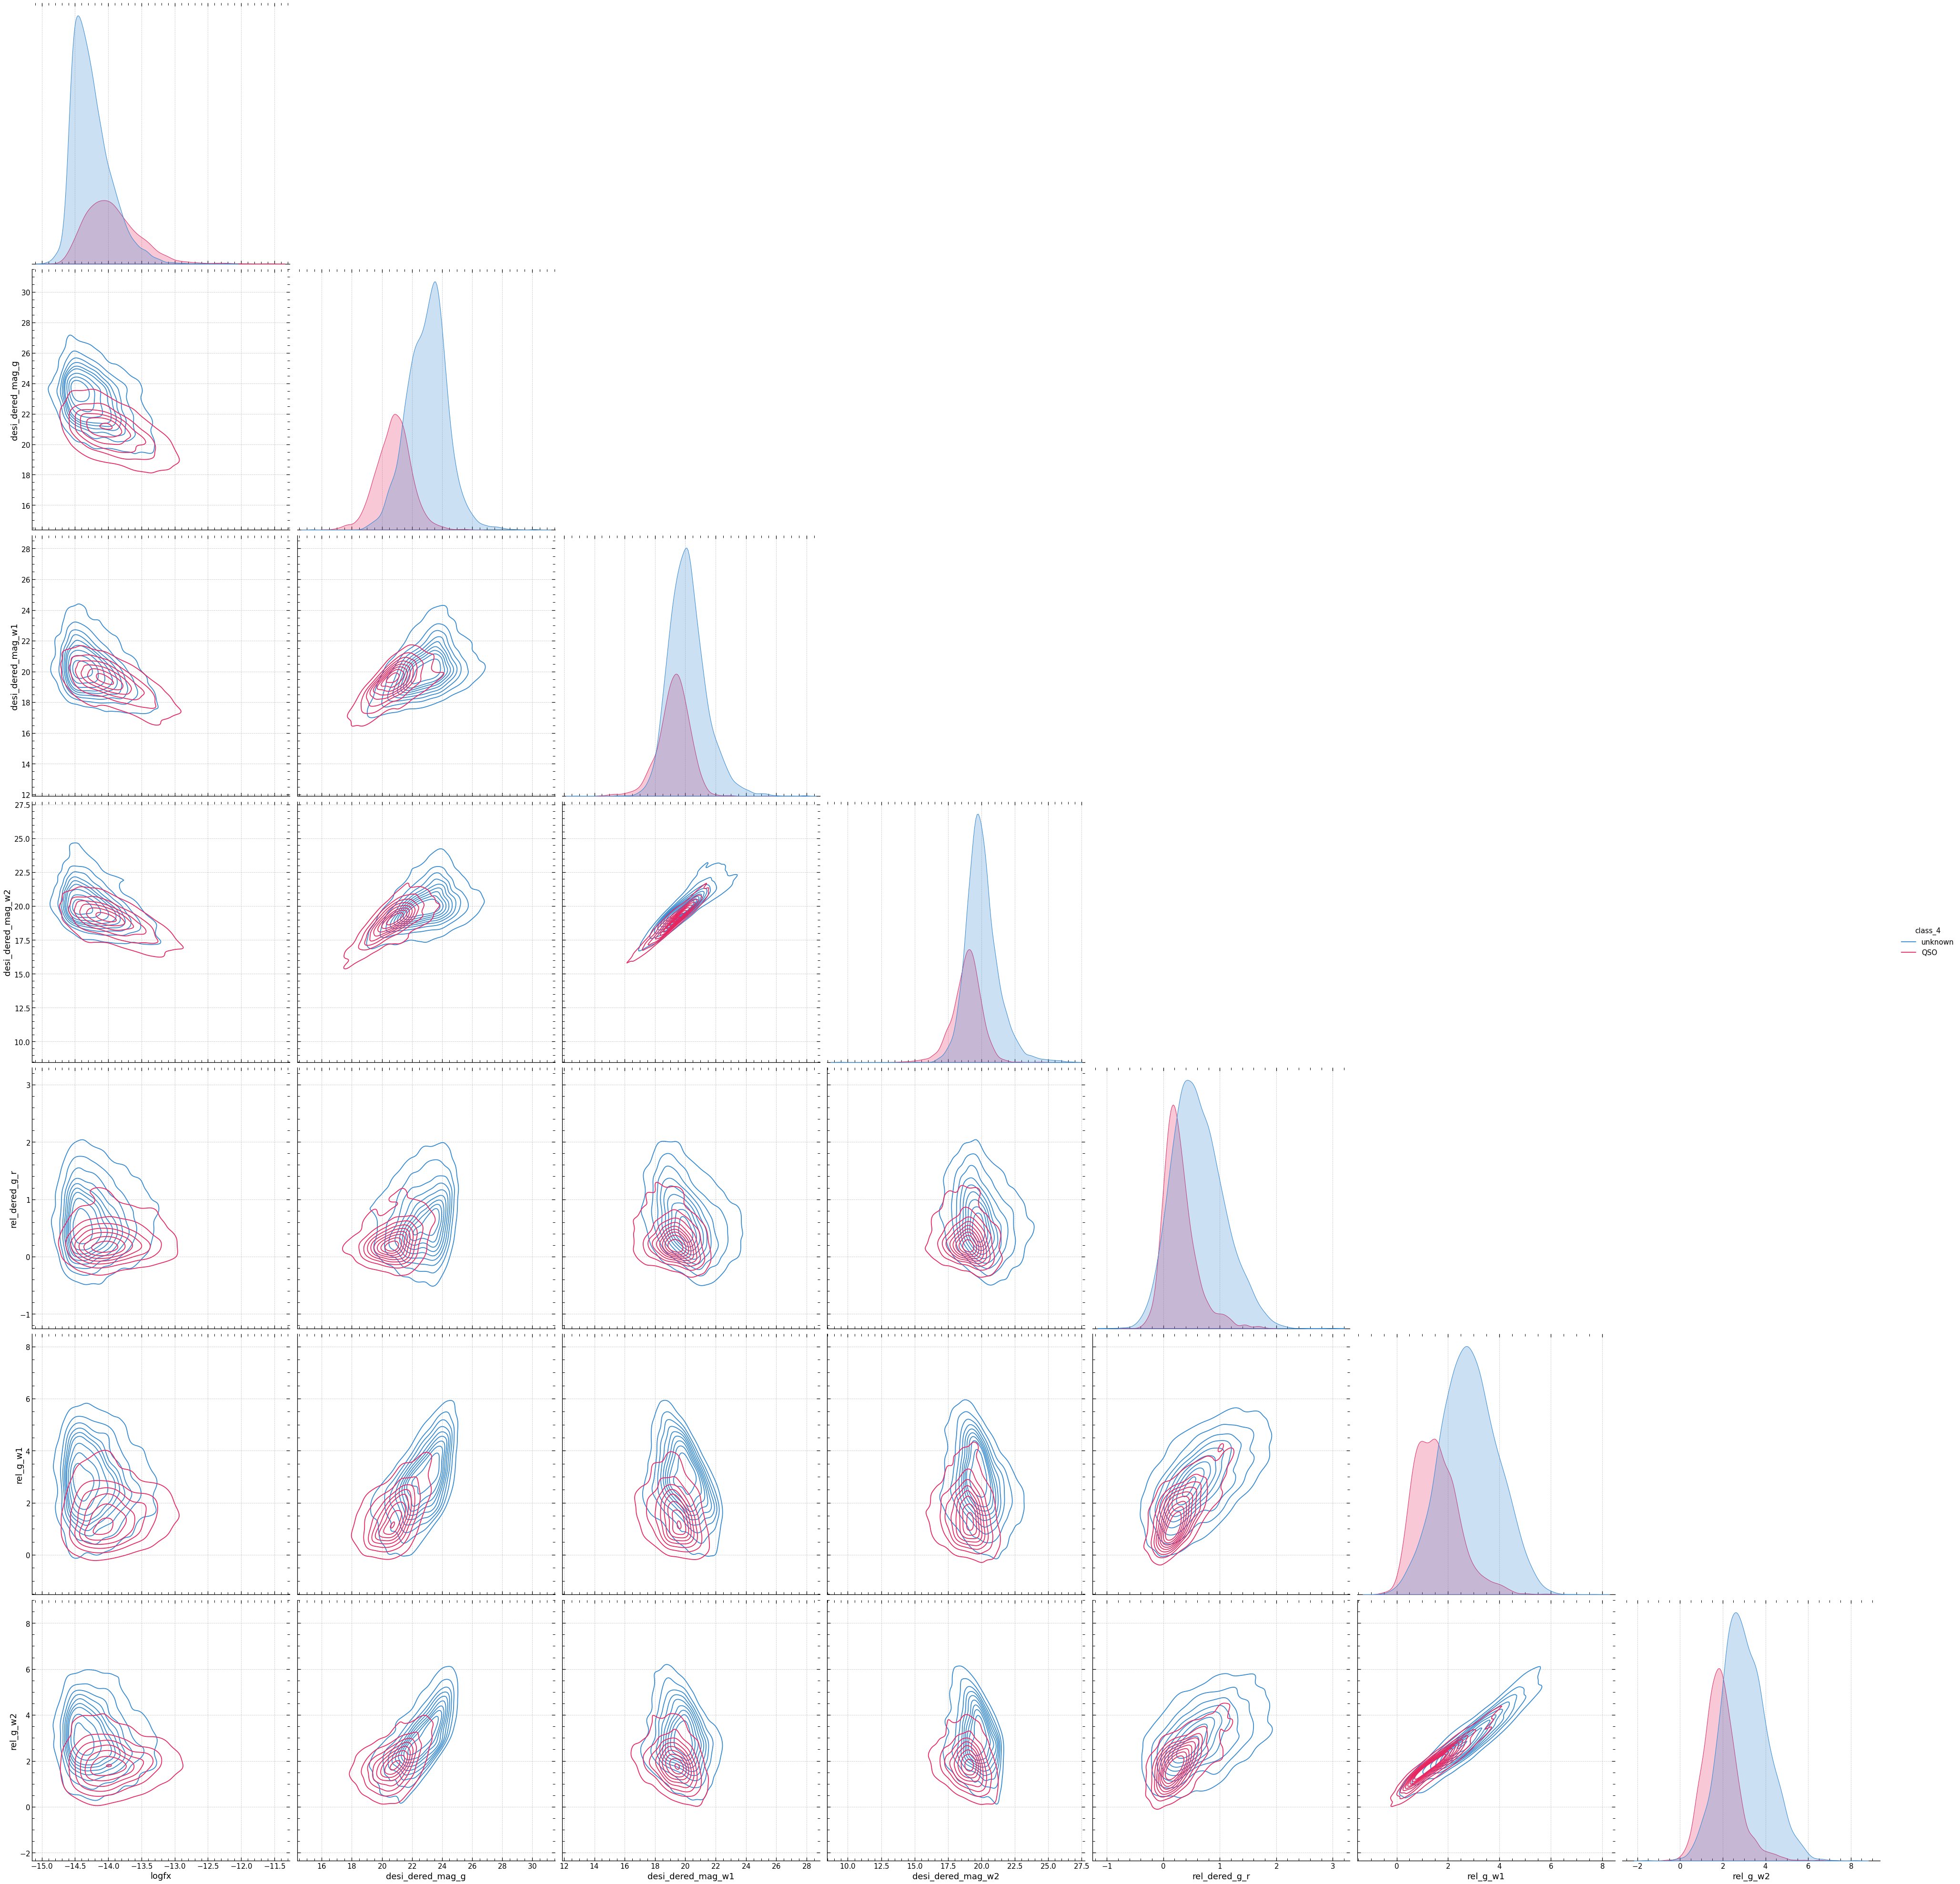

In [8]:
# df_compare = class_df.query('`rel_dered_lg(Fx/Fo_z_corr)`>= -1 & (class_4=="QSO"  | class_4 == "unknown"  )')
# df_compare['logfx'] = np.log10(df_compare['flux_05-20'])
# df_compare

# #compare classes unknown and QSO

# #fig,  ax =  plt.subplots( figsize = (12,12))
# #sns.kdeplot(data = df_compare, x = 'flux_05-20', y = 'rel_dered_mag_g', hue = 'class_4', shade=True,  cmap='Blues', shade_alpha=.3, ax=ax, log_scale=True)
# vars_to_plot = ['logfx',  'desi_dered_mag_g',  'desi_dered_mag_w1', 'desi_dered_mag_w2', 'rel_dered_g_r',  'rel_g_w1', 'rel_g_w2']
# sns.pairplot(data = df_compare, vars = vars_to_plot, hue = 'class_4', kind = 'kde', height = 8, aspect = 1, corner=True)

